In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd
import scipy.stats as stats

In [3]:
import matplotlib.pyplot as plt

In [4]:
import sklearn

In [5]:
import statsmodels.api as sm

In [6]:
import seaborn as sns
sns.set_style("whitegrid")
sns.set_context("poster")

In [7]:
from matplotlib import rcParams

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

In [9]:
def cv_optimize(clf, parameters, X, y, n_jobs=1, n_folds=5, score_func=None):
    if score_func:
        gs = GridSearchCV(clf, param_grid=parameters, cv=n_folds, n_jobs=n_jobs, scoring=score_func)
    else:
        gs = GridSearchCV(clf, param_grid=parameters, n_jobs=n_jobs, cv=n_folds)
    gs.fit(X, y)
    print ("BEST", gs.best_params_, gs.best_score_, gs.cv_results_)
    best = gs.best_estimator_
    return best

In [10]:
def do_classify(clf, parameters, indf, featurenames, targetname, target1val, mask=None, reuse_split=None, score_func=None, n_folds=5, n_jobs=1):
    subdf=indf[featurenames]
    X=subdf.values
    y=(indf[targetname].values==target1val)*1
    if mask.all() !=None:
        print ("using mask")
        Xtrain, Xtest, ytrain, ytest = X[mask], X[~mask], y[mask], y[~mask]
    if reuse_split !=None:
        print ("using reuse split")
        Xtrain, Xtest, ytrain, ytest = reuse_split['Xtrain'], reuse_split['Xtest'], reuse_split['ytrain'], reuse_split['ytest']
    if parameters:
        clf = cv_optimize(clf, parameters, Xtrain, ytrain, n_jobs=n_jobs, n_folds=n_folds, score_func=score_func)
    clf=clf.fit(Xtrain, ytrain)
    training_accuracy = clf.score(Xtrain, ytrain)
    test_accuracy = clf.score(Xtest, ytest)
    print ("############# based on standard predict ################")
    print ("Accuracy on training data: %0.2f" % (training_accuracy))
    print ("Accuracy on test data:     %0.2f" % (test_accuracy))
    print (confusion_matrix(ytest, clf.predict(Xtest)))
    print ("########################################################")
    return clf, Xtrain, ytrain, Xtest, ytest

In [11]:
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(['#FFAAAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])

In [12]:
def plot_2tree(ax, Xtr, Xte, ytr, yte, clf, plot_train = True, plot_test = True, lab = ['Feature 1', 'Feature 2'], mesh=True, colorscale=cmap_light, cdiscrete=cmap_bold, alpha=0.3, psize=10, zfunc=False):
    plt.figure(figsize=(15,10))
    plot_step= 0.05
    xmin, xmax= Xtr[:,0].min(), Xtr[:,0].max()
    ymin, ymax= Xtr[:,1].min(), Xtr[:,1].max()
    xx, yy = np.meshgrid(np.arange(xmin, xmax, plot_step), np.arange(ymin, ymax, plot_step) )

    Xplot= np.c_[xx.ravel(), yy.ravel()]

    Z = clfTree1.predict( Xplot )

    Z= Z.reshape( xx.shape )
    cs = plt.contourf(xx, yy, Z, cmap= cmap_light, alpha=0.3)
  
    if (plot_train == True):
        plt.scatter(Xtr[:, 0], Xtr[:, 1], c=ytr-1, cmap=cmap_bold, alpha=alpha,edgecolor="k") 
    if (plot_test == True):
        plt.scatter(Xte[:, 0], Xte[:, 1], c=yte-1, cmap=cmap_bold, alpha=alpha, marker="s")

    plt.xlabel(lab[0])
    plt.ylabel(lab[1])
    plt.title("Boundary for decision tree classifier",fontsize=7.5)


In [13]:
df = pd.read_csv('winequality-red.csv', sep=';')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
df.shape

(1599, 12)

In [15]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


(array([ 10.,   0.,  53.,   0., 681.,   0., 638.,   0., 199.,  18.]),
 array([3. , 3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. ]),
 <a list of 10 Patch objects>)

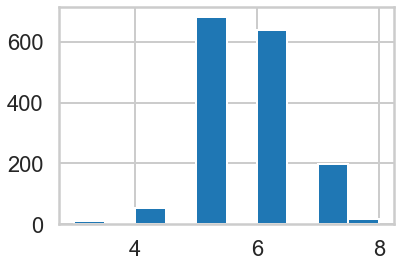

In [16]:
plt.hist(df.quality)

In [17]:
Y = df['quality'].values
df_tmp = df.drop('quality',1)
Y = np.array([1 if y>=7 else 0 for y in Y])
X = df_tmp.as_matrix()

df['target'] = (df['quality'].values >=7)*1

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


In [18]:
Xnames = list(df.columns.values[1:11])

In [19]:
np.mean(df['target'])

0.1357098186366479

In [20]:
itrain, itest = train_test_split(range(df.shape[0]), train_size=0.6)
mask=np.ones(df.shape[0], dtype='int')
mask[itrain]=1
mask[itest]=0
mask = (mask==1)

In [21]:
print ("% Good wines in Training:", np.mean(df.target[mask]))
print ("% Good wines in Testing:", np.mean(df.target[~mask]))

% Good wines in Training: 0.13555787278415016
% Good wines in Testing: 0.1359375


In [22]:
from sklearn import tree
clfTree1 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6]}
clfTree1, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree1, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 6, 'min_samples_leaf': 2} 0.4214723195612128 {'mean_fit_time': array([0.00329137, 0.00089493, 0.00050926, 0.00112748, 0.00223613,
       0.00093393, 0.00187778, 0.00169268, 0.00145125, 0.00169291,
       0.00206366, 0.00220194, 0.00123506, 0.00213141, 0.0026299 ,
       0.00215921, 0.0009769 , 0.00250087, 0.00265026, 0.00050831,
       0.00202241, 0.00292282, 0.00202961, 0.00229063, 0.0019968 ,
       0.00243716, 0.00332136, 0.00284319, 0.00154552, 0.00162106,
       0.00178375, 0.00145187, 0.00237594, 0.00286074, 0.00131307,
       0.0020575 , 0.00248384, 0.0010067 , 0.00242743, 0.00020761,
       0.0004498 , 0.0023313 ]), 'std_fit_time': array([0.00112868, 0.00134293, 0.00064802, 0.00069319, 0.00080166,
       0.00089215, 0.00192685, 0.00146321, 0.00102244, 0.00041142,
       0.00132956, 0.00136661, 0.00047802, 0.00164513, 0.00208288,
       0.00158719, 0.00087004, 0.00159043, 0.00136359, 0.00062394,
       0.00139034, 0.0015306 , 0.00041262, 0.00132298,

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


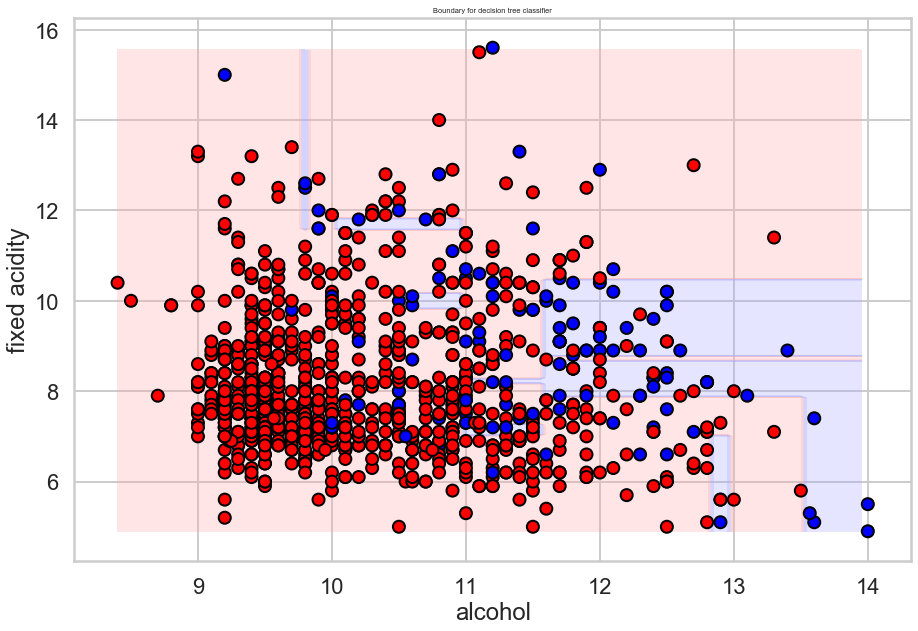

In [23]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_test = False)

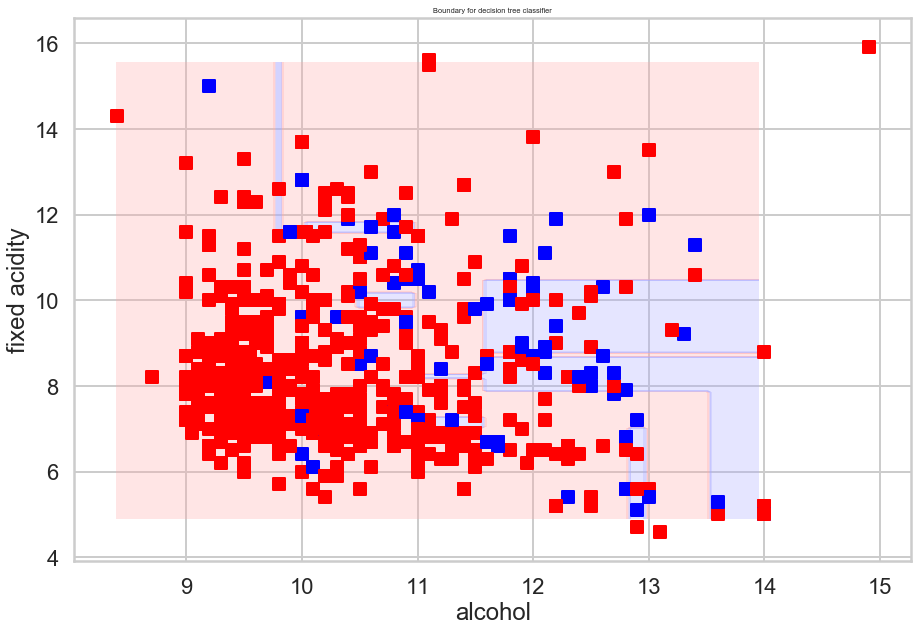

In [24]:
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree1, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = False)

using mask
BEST {'max_depth': None, 'min_samples_leaf': 4} 0.3541094577168369 {'mean_fit_time': array([0.0024436 , 0.00261364, 0.00286798]), 'std_fit_time': array([0.00194686, 0.00174057, 0.00086054]), 'mean_score_time': array([0.0017952 , 0.00323572, 0.00251255]), 'std_score_time': array([0.00074652, 0.00161817, 0.00046558]), 'param_max_depth': masked_array(data=[None, None, None],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'param_min_samples_leaf': masked_array(data=[4, 5, 6],
             mask=[False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'max_depth': None, 'min_samples_leaf': 4}, {'max_depth': None, 'min_samples_leaf': 5}, {'max_depth': None, 'min_samples_leaf': 6}], 'split0_test_score': array([0.25806452, 0.3125    , 0.3125    ]), 'split1_test_score': array([0.38596491, 0.33333333, 0.34782609]), 'split2_test_score': array([0.34146341, 0.4       , 0.36363636]), 'split3_test_score': array([0.45161

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)



############# based on standard predict ################
Accuracy on training data: 0.92
Accuracy on test data:     0.85
[[513  40]
 [ 58  29]]
########################################################


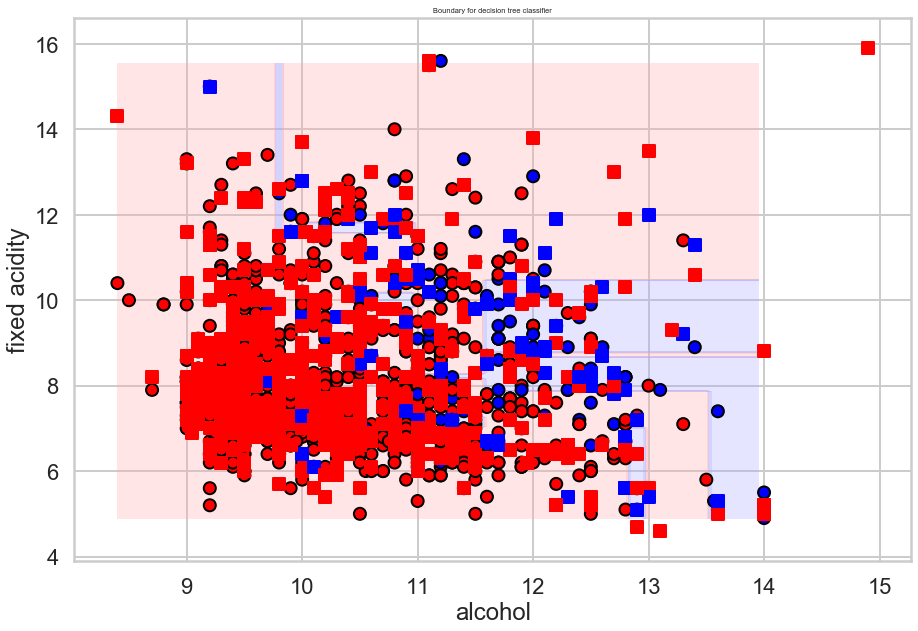

In [25]:
from sklearn import tree
clfTree_temp = tree.DecisionTreeClassifier()

parameters = {"max_depth": [None], 'min_samples_leaf': [4, 5, 6]}
clfTree_temp, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree_temp, parameters, df, 
                                                     ['alcohol', 'fixed acidity'],'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')
plot_2tree(plt, Xtrain, Xtest, ytrain, ytest, clfTree_temp, 
           lab = ['alcohol', 'fixed acidity'], alpha = 1, plot_train = True)

In [26]:
clfTree2 = tree.DecisionTreeClassifier()

parameters = {"max_depth": [1, 2, 3, 4, 5, 6, 7], 'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]}
clfTree2, Xtrain, ytrain, Xtest, ytest = do_classify(clfTree2, parameters, df, 
                                                     Xnames,'target', 1, 
                                                     mask=mask, n_jobs = 4, score_func = 'f1')

using mask
BEST {'max_depth': 7, 'min_samples_leaf': 3} 0.429031613172585 {'mean_fit_time': array([0.00304646, 0.00191245, 0.00239134, 0.0017118 , 0.00210733,
       0.00222626, 0.00173297, 0.00202241, 0.0021884 , 0.00317245,
       0.00333748, 0.00367427, 0.00281711, 0.00323524, 0.00312257,
       0.0030757 , 0.00398932, 0.00346951, 0.00190573, 0.00286379,
       0.00484686, 0.00355372, 0.0053091 , 0.00342374, 0.00376301,
       0.00405521, 0.00276837, 0.0038414 , 0.00547652, 0.00251575,
       0.00463257, 0.00710979, 0.00485611, 0.00564981, 0.00411019,
       0.00641365, 0.00472593, 0.00445743, 0.00447907, 0.00516801,
       0.00640082, 0.00505395, 0.00685091, 0.00651441, 0.0066783 ,
       0.00390987, 0.00682302, 0.00461998, 0.00462775, 0.00449629,
       0.00610242, 0.00815816, 0.00701036, 0.0079361 , 0.00747485,
       0.00643349, 0.00594583, 0.00650196, 0.00829601, 0.00779738,
       0.00781908, 0.00756497, 0.0089592 , 0.00706863, 0.00697126,
       0.00616975, 0.00655127, 0.0063

c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [27]:
from sklearn.ensemble import RandomForestClassifier

clfForest = RandomForestClassifier()

parameters = {"n_estimators": range(1, 20)}
clfForest, Xtrain, ytrain, Xtest, ytest = do_classify(clfForest, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')


using mask
BEST {'n_estimators': 15} 0.44442447472594737 {'mean_fit_time': array([0.0056922 , 0.01222482, 0.01627641, 0.02143083, 0.02354918,
       0.03108916, 0.03204942, 0.03450694, 0.04269085, 0.05148883,
       0.05780582, 0.06313629, 0.06351128, 0.07563286, 0.07711387,
       0.07873964, 0.08345528, 0.08650022, 0.09463835]), 'std_fit_time': array([0.00206854, 0.0018004 , 0.00182188, 0.00219183, 0.00241209,
       0.00340212, 0.00295093, 0.00169896, 0.00277839, 0.0059196 ,
       0.0079938 , 0.00892159, 0.00400139, 0.00897641, 0.00920617,
       0.00811397, 0.012025  , 0.00966972, 0.00542879]), 'mean_score_time': array([0.00380058, 0.00348277, 0.00338802, 0.00443029, 0.00501399,
       0.00264549, 0.00261645, 0.00418954, 0.0040482 , 0.00604506,
       0.00651059, 0.0070682 , 0.00592432, 0.00696616, 0.0046248 ,
       0.00523896, 0.00542326, 0.00426908, 0.00562506]), 'std_score_time': array([0.00040362, 0.00124768, 0.0018565 , 0.00202603, 0.00210278,
       0.00192176, 0.00160012, 

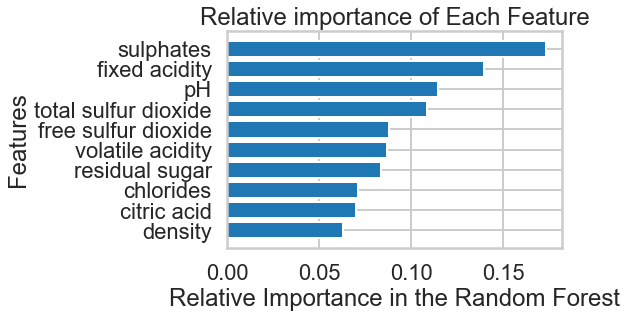

In [28]:
importance_list = clfForest.feature_importances_
name_list = df.columns
importance_list, name_list = zip(*sorted(zip(importance_list, name_list)))
plt.barh(range(len(name_list)),importance_list,align='center')
plt.yticks(range(len(name_list)),name_list)
plt.xlabel('Relative Importance in the Random Forest')
plt.ylabel('Features')
plt.title('Relative importance of Each Feature')
plt.show()

In [29]:
from sklearn.ensemble import AdaBoostClassifier

clfAda = AdaBoostClassifier()

parameters = {"n_estimators": range(10, 60)}
clfAda, Xtrain, ytrain, Xtest, ytest = do_classify(clfAda, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask
BEST {'n_estimators': 26} 0.44411284365422327 {'mean_fit_time': array([0.05039024, 0.05886512, 0.06007581, 0.07062211, 0.07825375,
       0.0774281 , 0.08079519, 0.08785181, 0.10455828, 0.11060648,
       0.09898844, 0.1183836 , 0.11562834, 0.10665588, 0.10810533,
       0.11450634, 0.10956831, 0.12296939, 0.12926736, 0.13518729,
       0.13885217, 0.1515842 , 0.18857245, 0.17591162, 0.17349954,
       0.18218322, 0.19866514, 0.1941844 , 0.18904467, 0.20815554,
       0.19095335, 0.19357848, 0.20041409, 0.21894207, 0.20977588,
       0.20999894, 0.22328267, 0.24681602, 0.23513675, 0.2779707 ,
       0.27675099, 0.28665466, 0.24876542, 0.26390243, 0.26377158,
       0.31543646, 0.31311264, 0.27797675, 0.27144165, 0.28022223]), 'std_fit_time': array([0.00430538, 0.00574906, 0.0146171 , 0.00836816, 0.01904404,
       0.0078869 , 0.00797985, 0.01218861, 0.01077301, 0.02069295,
       0.00724051, 0.00920433, 0.0149729 , 0.01684123, 0.01641555,
       0.01488332, 0.01005987, 0.004

 [ 61  26]]
########################################################


In [30]:
from sklearn.ensemble import GradientBoostingClassifier

clfGB = GradientBoostingClassifier()

parameters = {"n_estimators": range(30, 60), "max_depth": [1, 2, 3, 4, 5]}
clfGB, Xtrain, ytrain, Xtest, ytest = do_classify(clfGB, parameters, 
                                                       df, Xnames, 'target', 1, mask=mask, 
                                                       n_jobs = 4, score_func='f1')

using mask


c:\users\dell\appdata\local\programs\python\python37\lib\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


BEST {'max_depth': 4, 'n_estimators': 37} 0.4648517935094188 {'mean_fit_time': array([0.04948616, 0.05095873, 0.0622961 , 0.0673749 , 0.07152143,
       0.08089147, 0.08403649, 0.08536048, 0.08592978, 0.09271698,
       0.0970623 , 0.1047184 , 0.08154068, 0.0769011 , 0.06885943,
       0.09320159, 0.06232543, 0.08351278, 0.08755479, 0.08723989,
       0.09285617, 0.06903048, 0.0732481 , 0.09153833, 0.09287405,
       0.08101997, 0.10674472, 0.08996339, 0.09462771, 0.09611516,
       0.06850915, 0.05299416, 0.05607734, 0.08032074, 0.06212029,
       0.07075872, 0.06871114, 0.07353835, 0.07804379, 0.0955337 ,
       0.08714185, 0.07872672, 0.09307184, 0.08320417, 0.09655213,
       0.10622149, 0.09519463, 0.09382873, 0.10101223, 0.10664563,
       0.11566286, 0.0999043 , 0.0971683 , 0.10292816, 0.10805984,
       0.11571054, 0.12070055, 0.11664596, 0.11663122, 0.10964394,
       0.09806166, 0.10152307, 0.08811941, 0.09972978, 0.10699453,
       0.11734943, 0.11295404, 0.11235557, 0.11524

############# based on standard predict ################
Accuracy on training data: 0.97
Accuracy on test data:     0.87
[[530  23]
 [ 58  29]]
########################################################


In [31]:
from sklearn.tree import DecisionTreeClassifier
import sklearn.linear_model
import sklearn.svm

def plot_decision_surface(clf, X_train, Y_train):
    plot_step=0.1
    
    if X_train.shape[1] != 2:
        raise ValueError("X_train should have exactly 2 columnns!")
    
    x_min, x_max = X_train[:, 0].min() - plot_step, X_train[:, 0].max() + plot_step
    y_min, y_max = X_train[:, 1].min() - plot_step, X_train[:, 1].max() + plot_step
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

    clf.fit(X_train,Y_train)
    if hasattr(clf, 'predict_proba'):
        Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:,1]
    else:
        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])    
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.Reds)
    plt.scatter(X_train[:,0],X_train[:,1],c=Y_train,cmap=plt.cm.Paired)
    plt.show()
    
imp_cols = clfForest.feature_importances_.argsort()[::-1][0:2]

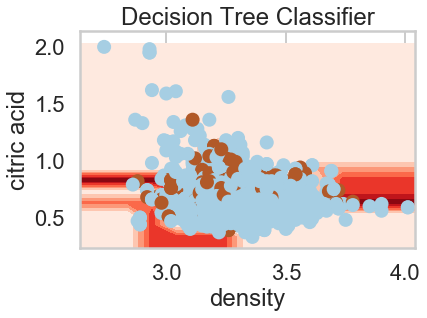

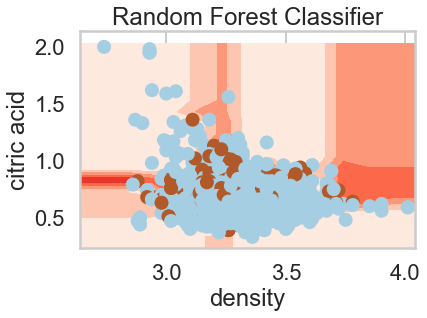

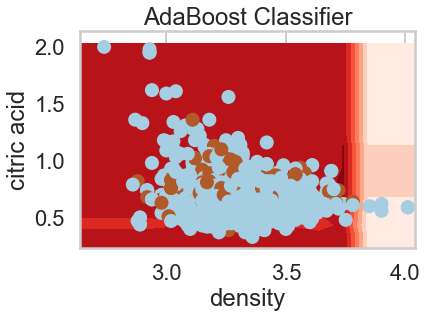

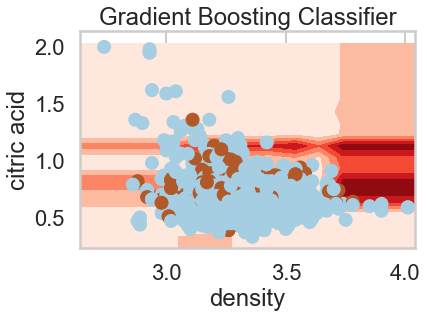

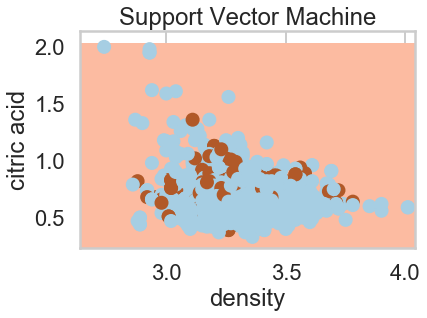

In [32]:
X_imp = df[['pH', 'sulphates']].values

classifiers = [clfTree2,
               clfForest,
               clfAda,
               clfGB,
               sklearn.svm.SVC(C=100.0, gamma=1.0)]

titleClassifer = ['Decision Tree Classifier', 'Random Forest Classifier', 
                  'AdaBoost Classifier', 'Gradient Boosting Classifier', 'Support Vector Machine']
for c in range(5):
    plt.title(titleClassifer[c])
    plt.xlabel(name_list[0])
    plt.ylabel(name_list[1])
    plot_decision_surface(classifiers[c], X_imp, df.target.values)

In [33]:
df.target

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: target, Length: 1599, dtype: int32